<a href="https://colab.research.google.com/github/ankit-singh973/Deep_Learning_tensorflow/blob/main/4_1_CNN_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-26 04:40:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.207, 173.194.195.207, 173.194.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  53.9MB/s    in 6.5s    

2023-12-26 04:40:31 (76.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walk through 10 classes of food image data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 1

In [3]:
# Setup train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


# **Visualization**

In [5]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


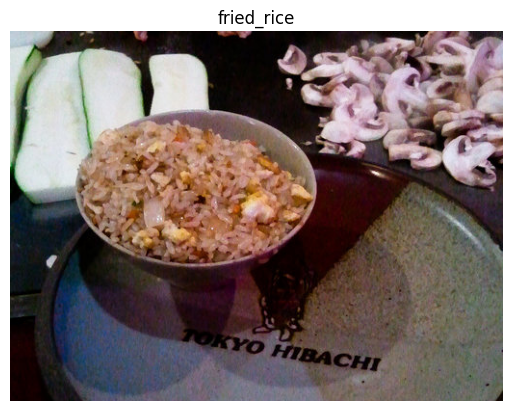

In [6]:
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

# **Preprocess Data**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

#Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model

model_8 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3)),
    Activation(activation = "relu"),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

# Compile the model
model_8.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
                 )



In [9]:
# Fit the model
history_8 = model_8.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 37s 135ms/step - loss: 2.0841 - accuracy: 0.2539 - val_loss: 1.9169 - val_accuracy: 0.3228
Epoch 2/5
235/235 [==============================] - 28s 120ms/step - loss: 1.7875 - accuracy: 0.3855 - val_loss: 1.8344 - val_accuracy: 0.3516
Epoch 3/5
235/235 [==============================] - 29s 124ms/step - loss: 1.5278 - accuracy: 0.4803 - val_loss: 1.8609 - val_accuracy: 0.3420
Epoch 4/5
235/235 [==============================] - 30s 129ms/step - loss: 1.0702 - accuracy: 0.6432 - val_loss: 2.1303 - val_accuracy: 0.3236
Epoch 5/5
235/235 [==============================] - 33s 139ms/step - loss: 0.4906 - accuracy: 0.8480 - val_loss: 3.0046 - val_accuracy: 0.3024


In [10]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

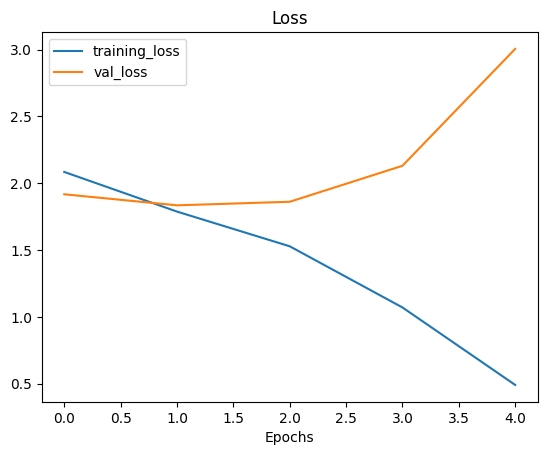

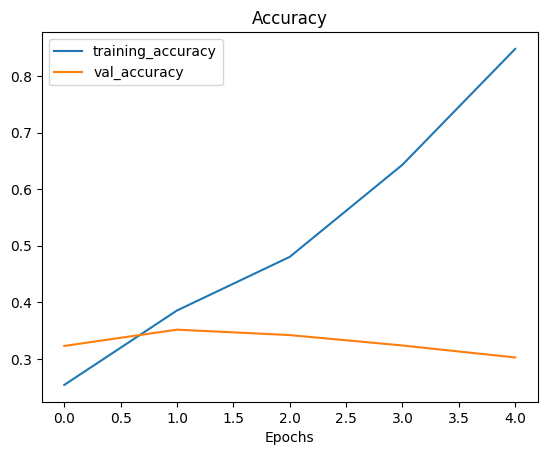

In [11]:
plot_loss_curves(history_8)

In [12]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

### conclusion: **Our model is OVERFITTING**

### **Adjust the model hyperparameters to reduce OVERFITTIG**

#### **Trying to improve model accuracy by removing Conv2D layers**

In [13]:
# Create our model

model_9 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3)),
    Activation(activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

# Compile the model
model_9.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
                 )

In [16]:
# Fit the model
history_9 = model_9.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 28s 113ms/step - loss: 2.3798 - accuracy: 0.1771 - val_loss: 2.0776 - val_accuracy: 0.2416
Epoch 2/5
235/235 [==============================] - 27s 115ms/step - loss: 1.9340 - accuracy: 0.3236 - val_loss: 2.0306 - val_accuracy: 0.2784
Epoch 3/5
235/235 [==============================] - 30s 129ms/step - loss: 1.6439 - accuracy: 0.4496 - val_loss: 2.1162 - val_accuracy: 0.2760
Epoch 4/5
235/235 [==============================] - 32s 136ms/step - loss: 1.2446 - accuracy: 0.6005 - val_loss: 2.2184 - val_accuracy: 0.3004
Epoch 5/5
235/235 [==============================] - 27s 114ms/step - loss: 0.8281 - accuracy: 0.7469 - val_loss: 2.5062 - val_accuracy: 0.2824


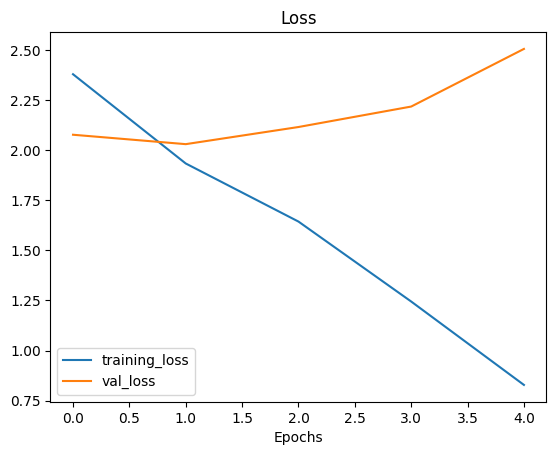

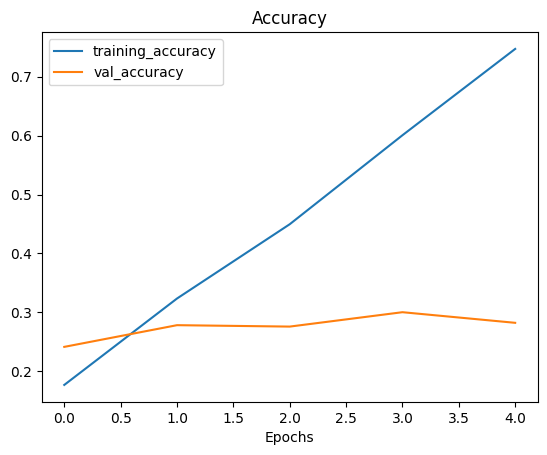

In [17]:
plot_loss_curves(history_9)

In [18]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 29160)            

### **Augement Training Data**

In [14]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = "categorical",
                                                                   shuffle = True) # 'shuffle = True' is good model training


Augmented training data
Found 7500 images belonging to 10 classes.


In [15]:
model_10 = tf.keras.models.clone_model(model_8)

#compile the cloned model

model_10.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [16]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 110s 462ms/step - loss: 2.3128 - accuracy: 0.1143 - val_loss: 2.2756 - val_accuracy: 0.1472
Epoch 2/5
235/235 [==============================] - 108s 460ms/step - loss: 2.2600 - accuracy: 0.1520 - val_loss: 2.1525 - val_accuracy: 0.2228
Epoch 3/5
235/235 [==============================] - 114s 486ms/step - loss: 2.1579 - accuracy: 0.2117 - val_loss: 1.9812 - val_accuracy: 0.3024
Epoch 4/5
235/235 [==============================] - 110s 468ms/step - loss: 2.0637 - accuracy: 0.2737 - val_loss: 1.8855 - val_accuracy: 0.3512
Epoch 5/5
235/235 [==============================] - 110s 469ms/step - loss: 1.9966 - accuracy: 0.3031 - val_loss: 1.8231 - val_accuracy: 0.3672


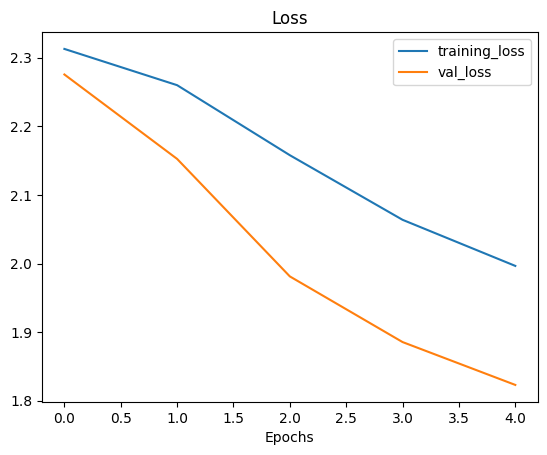

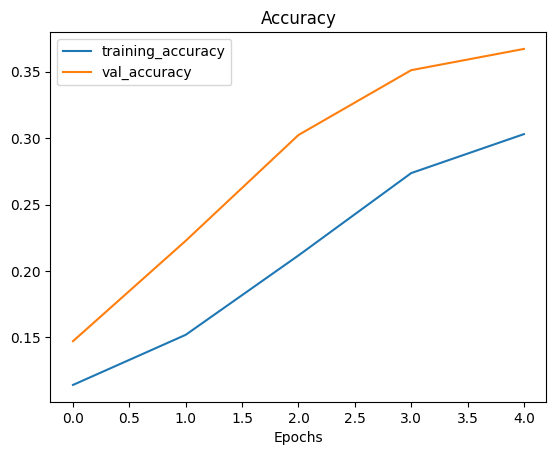

In [17]:
plot_loss_curves(history_10)

### **Compare model 8 and 10**

In [18]:
model_8.evaluate(test_data)

79/79 [==============================] - 7s 94ms/step - loss: 3.0046 - accuracy: 0.3024


[3.0045852661132812, 0.30239999294281006]

In [19]:
model_10.evaluate(test_data)

79/79 [==============================] - 8s 95ms/step - loss: 1.8231 - accuracy: 0.3672


[1.8230767250061035, 0.36719998717308044]

(None, None)

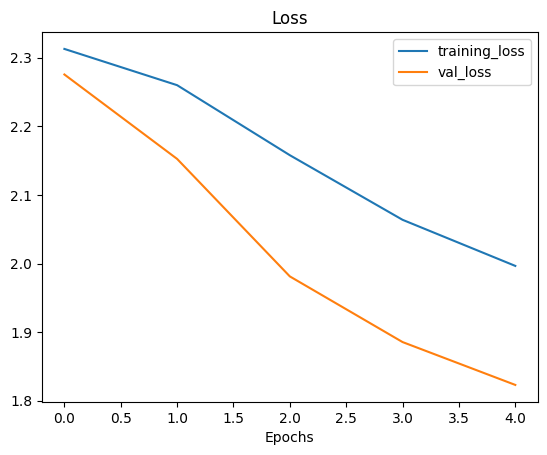

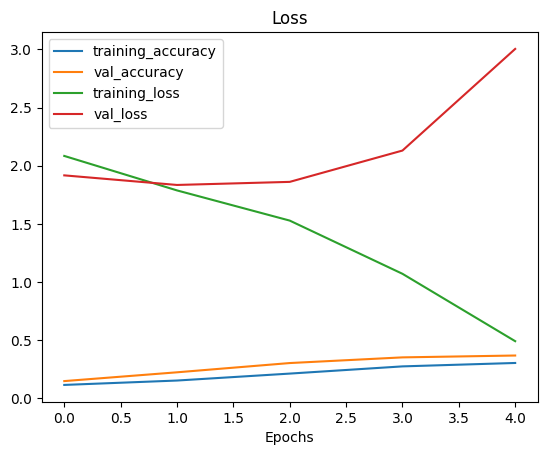

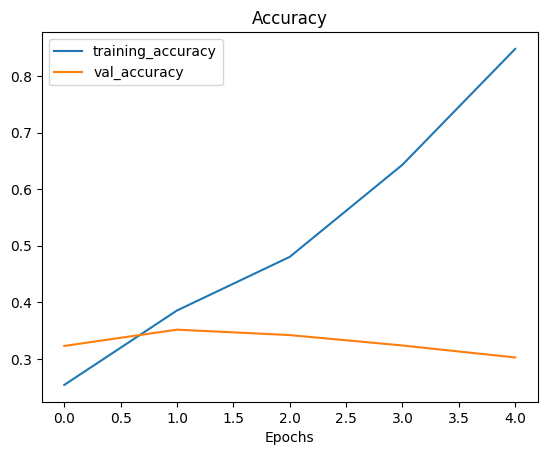

In [20]:
# Check out model trained on augmented data's loss curves
plot_loss_curves(history_10), plot_loss_curves(history_8)

### **Conclusion :**
> * In **model_10 Validation loss and training loss are decreasing** with increase in number of epochs, so, if model_10 trained for more epochs it can give better results. **This is good.**
> * while model_8 validation loss is increasing with increase in number of epochs, so training such model is not good.

In [21]:
model_11 = tf.keras.models.clone_model(model_10)

#compile the cloned model

model_11.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [22]:
# Fit the model
history_11 = model_11.fit(train_data_augmented,
                      epochs = 10,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/10
235/235 [==============================] - 110s 463ms/step - loss: 2.2383 - accuracy: 0.1603 - val_loss: 2.0853 - val_accuracy: 0.2448
Epoch 2/10
235/235 [==============================] - 110s 469ms/step - loss: 2.1081 - accuracy: 0.2385 - val_loss: 2.0481 - val_accuracy: 0.2592
Epoch 3/10
235/235 [==============================] - 109s 465ms/step - loss: 2.0629 - accuracy: 0.2676 - val_loss: 1.8694 - val_accuracy: 0.3524
Epoch 4/10
235/235 [==============================] - 109s 464ms/step - loss: 1.9919 - accuracy: 0.3021 - val_loss: 1.8887 - val_accuracy: 0.3632
Epoch 5/10
235/235 [==============================] - 109s 463ms/step - loss: 1.9701 - accuracy: 0.3084 - val_loss: 1.7994 - val_accuracy: 0.3860
Epoch 6/10
235/235 [==============================] - 108s 460ms/step - loss: 1.9321 - accuracy: 0.3288 - val_loss: 1.7536 - val_accuracy: 0.3936
Epoch 7/10
235/235 [==============================] - 111s 473ms/step - loss: 1.8987 - accuracy: 0.3447 - val_loss: 1.7320 -

## **Prediction on custom images**

In [23]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [24]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [25]:
# Create a function to import and resize it to be used iwth model

def load_and_prep_image(filename, img_shape = 224):
  """
  Reads an image from filename, turns it into a tensor and
  reshapes it to (img_shape, img_shape, colour_channels).
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decod ethe read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image between 0 & 1
  img = img/255.
  return img

In [26]:
def pred_and_plot(model, filename, class_names = class_names):

  """
  imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import target image and preprocess it
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  print(len(pred[0]))
  print(tf.argmax(pred))

  # we need to set a logic for multiclass
  if len(pred[0])>1:
    pred_class = class_names[int(tf.argmax(pred[0]))]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

#   # Get the predicted class (for binary classification)
#   pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 337ms/step
10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


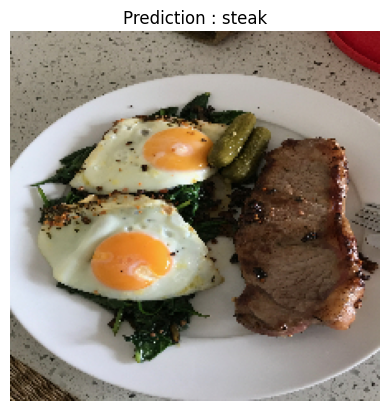

In [27]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 17ms/step
10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


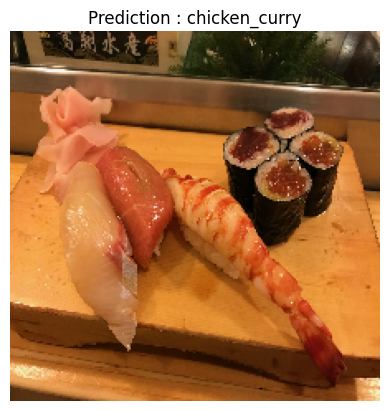

In [28]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="/content/03-sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 18ms/step
10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


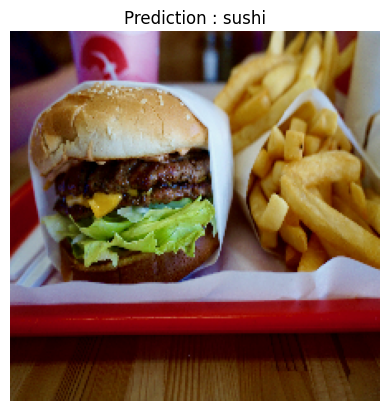

In [30]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="/content/03-hamburger.jpeg",
              class_names=class_names)

## **Conclusion:**
> ### **Our model's performance is not satisfactory so we'll use *Transfer Learning* to train our model**

In [31]:
#save model
model_11.save("model_11_multiclass")

In [32]:
model_8.save("model_8_multiclass")

In [33]:
model_10.save("model_10_multiclass")

In [34]:
# Load saved model
mo_11 = tf.keras.models.load_model("model_11_multiclass")
mo_11.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 1.6729 - accuracy: 0.4428


[1.6728712320327759, 0.44279998540878296]

In [38]:
import shutil

def zip_folder(folder_path, zip_file_path):
    try:
        # Create a zip file from the folder
        shutil.make_archive(zip_file_path, 'zip', folder_path)
        print(f'Zip file created successfully at: {zip_file_path}.zip')
    except Exception as e:
        print(f'Error creating zip file: {str(e)}')

# Specify the path to the folder you want to zip
folder_path = '/content/model_8_multiclass'

# Specify the path for the resulting zip file
zip_file_path = '/content/drive/MyDrive/Tensorflow/Saved_models'

# Call the function to create the zip file
zip_folder(folder_path, zip_file_path)


Zip file created successfully at: /content/drive/MyDrive/Tensorflow/Saved_models.zip
